In [1]:
import os # operating system
import glob # find the path
import pandas as pd
import numpy as np
import cv2
from matplotlib import image
import PIL
import pickle
import tensorflow
import tensorflow.keras as k
import pandas_ml
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.listdir()

[' Facial Keypoint Recogntion.ipynb',
 '.ipynb_checkpoints',
 '01 - Statements Assessment - execrise.ipynb',
 '02 - Iterators and Generators execrise.ipynb',
 '02- variables, expresion and function - excerise.ipynb',
 '03 - Functions and Methods execrise.ipynb',
 '03 - Python Strings - Execrise.ipynb',
 '04 - Errors and Exceptions execrise.ipynb',
 '04 - List, Tuple - execrise.ipynb',
 '05 - Dictionary - execrise.ipynb',
 '05- If else, for loop .ipynb',
 '06 - Sets - exercise.ipynb',
 '1. EDA Cricket.ipynb',
 '1. Exploratory Data Analysis - Cricket.ipynb',
 '1. Logistic Regression-MT Cars.html',
 '1. Math Operation in images.ipynb',
 '1. Pandas DataFrames.ipynb',
 '1. Regression with Tensorflow - cars.ipynb',
 '1. Understanding Support Vector Machines.ipynb',
 '1.FR-Reading Data .ipynb',
 '1.Image Processing .ipynb',
 '1.ML_BAYES_TENNIS_CLASSROOM.ipynb',
 '1.Regression BigMacIndex.ipynb',
 '2.Data Preprocessing - Training without PCA.ipynb',
 '2.ii.MTcars Regression.ipynb',
 '2.Number 

In [3]:
os.listdir('./face_data')

['female', 'male']

In [4]:
female =glob.glob('./face_data/female/*.png*')
male =glob.glob('./face_data/male/*.png*')

In [5]:
female

['./face_data/female\\female_0.png',
 './face_data/female\\female_1.png',
 './face_data/female\\female_10.png',
 './face_data/female\\female_11.png',
 './face_data/female\\female_110.png',
 './face_data/female\\female_111.png',
 './face_data/female\\female_112.png',
 './face_data/female\\female_113.png',
 './face_data/female\\female_12.png',
 './face_data/female\\female_13.png',
 './face_data/female\\female_14.png',
 './face_data/female\\female_15.png',
 './face_data/female\\female_16.png',
 './face_data/female\\female_17.png',
 './face_data/female\\female_18.png',
 './face_data/female\\female_19.png',
 './face_data/female\\female_2.png',
 './face_data/female\\female_20.png',
 './face_data/female\\female_21.png',
 './face_data/female\\female_22.png',
 './face_data/female\\female_25.png',
 './face_data/female\\female_27.png',
 './face_data/female\\female_28.png',
 './face_data/female\\female_29.png',
 './face_data/female\\female_3.png',
 './face_data/female\\female_30.png',
 './face_dat

In [6]:
type(female)

list

In [7]:
img = cv2.imread(female[0],0)

In [8]:
img

array([[101, 101, 101, ...,  67,  73,  73],
       [101, 101, 101, ...,  96,  76,  75],
       [101, 101, 101, ..., 114,  91,  72],
       ...,
       [149, 149, 152, ...,   1,   1,   0],
       [148, 149, 148, ...,   1,   1,   0],
       [146, 147, 147, ...,   1,   1,   1]], dtype=uint8)

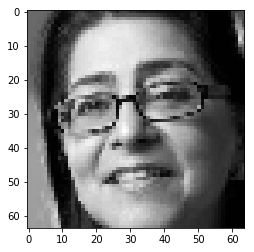

In [9]:
plt.imshow(img,cmap='gray')

In [10]:
img.shape

(64, 64)

In [11]:
tensor = img.reshape(1,64,64)

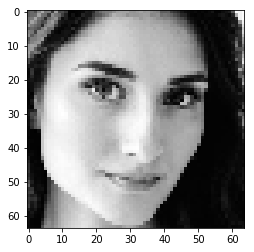

In [12]:
img1 = cv2.imread(female[1],0)
plt.imshow(img1,cmap='gray')
tensor1 = img1.reshape(1,64,64)

In [13]:
img1

array([[ 91, 104,  86, ..., 223, 220, 229],
       [ 93, 103, 106, ..., 160, 218, 225],
       [109, 118, 154, ...,  47, 216, 228],
       ...,
       [ 27,  18,  17, ...,  23,  21,  18],
       [ 25,  18,  17, ...,  22,  29,  26],
       [ 23,  19,  18, ...,  19,  21,  28]], dtype=uint8)

In [14]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA(0.85)

In [16]:
img_pca = pca.fit_transform(img1)

In [17]:
pca

PCA(copy=True, iterated_power='auto', n_components=0.85, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [18]:
pca.explained_variance_ratio_

array([0.31185634, 0.24822508, 0.15164152, 0.09040214, 0.05104434])

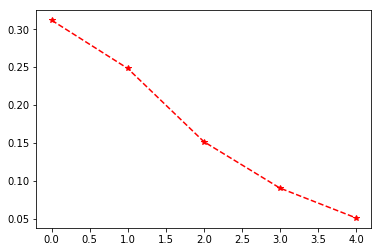

In [19]:
plt.plot(pca.explained_variance_ratio_,'r--*')

In [20]:
img_in = pca.inverse_transform(img_pca)

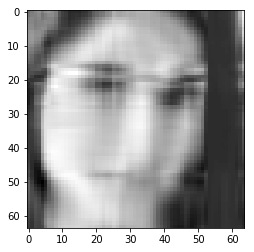

In [21]:
relu = np.maximum(img_in,0)
plt.imshow(img_in,cmap='gray')

In [22]:
pca.n_components_

5

In [23]:
# ROC- talk about how good is ur model  AUC - 

In [24]:
data = np.concatenate((tensor,tensor1),axis=0)
data.shape

(2, 64, 64)

In [25]:
# Getting Data
def imread(path):
    img = cv2.imread(path,0) # reading in gray scale
    tensor = img.reshape(1,64,64)
    return tensor

In [26]:
# Getting Data
pca = PCA(0.8)
def imread_pca(path):
    img = cv2.imread(path,0)
    img = pca.fit_transform(img)
    img = pca.inverse_transform(img)
    img = np.maximum(img,0)
    tensor = img.reshape(1,64,64)
    return tensor

In [27]:
for i,path in enumerate(female):
    try:
        tensor = imread(path)
        xwf = np.concatenate((xwf,tensor),axis=0)
    except:
        xwf = tensor
        
for i,path in enumerate(male):
    try:
        tensor = imread(path)
        xwm = np.concatenate((xwm,tensor),axis=0)
    except:
        xwm = tensor

In [28]:
for i,path in enumerate(female):
    try:
        tensor = imread_pca(path)
        xf = np.concatenate((xf,tensor),axis=0)
    except:
        xf = tensor
        
for i,path in enumerate(male):
    try:
        tensor = imread_pca(path)
        xm = np.concatenate((xm,tensor),axis=0)
    except:
        xm = tensor

In [29]:
xwf.shape,xwm.shape

((64, 64, 64), (74, 64, 64))

In [30]:
xf.shape, xm.shape

((64, 64, 64), (74, 64, 64))

In [31]:
x = np.concatenate(((xm,xf)),axis=0)
x.shape

(138, 64, 64)

In [32]:
with open('./Imagedata.pkl','wb') as f:
    pickle.dump(x,f)

In [33]:
xw = np.concatenate(((xwm,xwf)),axis=0)
xw.shape

(138, 64, 64)

In [34]:
# eigan face - type of feature extraction

- **male =0**
- **female =1**

In [35]:
ym = np.zeros(len(male))
yf = np.ones(len(female))
y = np.concatenate((ym,yf))
y.shape

(138,)

In [36]:
np.savez('data_without_pca.npz',xw,y) # save as zip file

In [37]:
data = np.load('data_without_pca.npz')

In [38]:
data.files

['arr_0', 'arr_1']

In [39]:
data['arr_0'].shape

(138, 64, 64)

### With PCA

In [40]:
np.savez('data_with_pca.npz',x,y)

In [41]:
datap = np.load('data_with_pca.npz')

In [42]:
# here pca is to remove the noise

In [43]:
datap.files

['arr_0', 'arr_1']